<a href="https://colab.research.google.com/github/huavanson/PhanTich_TuyenSinh/blob/master/TuyenSinh2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PHÂN TÍCH ĐÁNH GIÁ KẾT QUẢ THI TUYỂN SINH 2021 DỰA TRÊN BẢNG SỐ LIỆU**

**Bài phân tích bao gồm các nhận xét và các kết quả thống kê được từ dự liệu kết quả thi tuyển sinh năm 2021, sử dụng thư viện hỗ trợ chính Pandas và matplotlib**

**Pipeline chính:**

1.   Các bước Load và phân tích dữ liệu
2.   Các kết quả thống kê và nhận xét



 


1.Các Bước Load và phân tích dữ liệu

Sử dụng pandas đọc dữ liệu 




In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/tuyensinh2021/2.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,_id,_index,_score,_source,_type,kythi
0,OND33noBrZdVKVdygoG1,student_thpt,0,"{'examination_id': 1, 'name': '', 'sbd': '0100...",_doc,NaN
1,OdD33noBrZdVKVdygoHC,student_thpt,0,"{'examination_id': 1, 'name': '', 'sbd': '0100...",_doc,NaN
2,OtD33noBrZdVKVdygoHT,student_thpt,0,"{'examination_id': 1, 'name': '', 'sbd': '0100...",_doc,NaN
3,O9D33noBrZdVKVdygoHb,student_thpt,0,"{'examination_id': 1, 'name': '', 'sbd': '0100...",_doc,NaN
4,PND33noBrZdVKVdygoHk,student_thpt,0,"{'examination_id': 1, 'name': '', 'sbd': '0100...",_doc,NaN
...,...,...,...,...,...,...
899589,fOIsTnsBrZdVKVdyY7eG_v2,student_thpt,0,"{'examination_id': 1, 'name': '', 'sbd': '5700...",_doc,2021_2_v2
899590,feIsTnsBrZdVKVdyY7eI_v2,student_thpt,0,"{'examination_id': 1, 'name': '', 'sbd': '5700...",_doc,2021_2_v2
899591,fuIsTnsBrZdVKVdyY7eK_v2,student_thpt,0,"{'examination_id': 1, 'name': '', 'sbd': '5700...",_doc,2021_2_v2
899592,f-IsTnsBrZdVKVdyY7eM_v2,student_thpt,0,"{'examination_id': 1, 'name': '', 'sbd': '5700...",_doc,2021_2_v2


In [72]:
df['_source'][0]

"{'examination_id': 1, 'name': '', 'sbd': '01000001', 'school_id': 49, 'score': 'Toán:2.20;Văn:3.50;Lí:;Hóa:;Sinh:;Sử:2.50;Địa:5.50;GDCD:;Ngoại Ngữ:;'}"

Nhận xét đầu tiên về dataframe : 

1.   Có nhiều thông tin dư thừa không cần thiết cần được loại bỏ
2.   Có thể thấy những thông tin quan trọng cần thiết nằm ở cột _source của dữ liệu bao gồm các điểm số của từng môn
3.   Những cột điểm của một số môn không có điểm có thể là do thí sinh bỏ thi hoặc là thí sinh chọn thi theo tổ hợp KHTN hoặc tổ hợp KHXH   



Ta có thể lượt bỏ những thông tin không cần thiết ở những cột khác và rút trích những thông tin chủ yếu ở chỉ mục 'score' trong cột '_source'.  

In [3]:
from tqdm import tqdm
#rút trích thông tin về điểm và lưu vào list a 
lst = [df.iloc[i]['_source'].split(",")[4][11:-2].split(";")[0:-1] for i in tqdm(range(len(df)))]
a = [[i.split(":") for i in index] for index in tqdm(lst)]  

100%|██████████| 899594/899594 [00:16<00:00, 53301.29it/s]


Tiếp theo lưu những thông tin về điểm vào 1 dataframe khác thuận tiện cho việc xử lí cũng như thống kê
 

In [4]:
math = []
literature = []                           # tạo các list chứa điểm từng môn
physical = []
chemistry = []
biology = [] 
history = []
georophy = []
gdcd = []
eng = []
for per in a :
  for index in per :
    if index[0]=='Toán':                  
      if index[1]=='':
        math.append(None)                   # những điểm nào bị trống sẽ lưu là none
      else:
        math.append(float(index[1]))        # ép kiểu từ string sang float
    if index[0]=='Văn':
      if index[1]=='':
        literature.append(None)
      else:
        literature.append(float(index[1]))
    if index[0]=='Lí':
      if index[1]=='':
        physical.append(None)
      else:
        physical.append(float(index[1]))
    if index[0]=='Hóa':
      if index[1]=='':
        chemistry.append(None)
      else:
        chemistry.append(float(index[1]))
    if index[0]=='Sinh':
      if index[1]=='':
        biology.append(None)
      else:
        biology.append(float(index[1]))
    if index[0]=='Sử':
      if index[1]=='':
        history.append(None)
      else:
        history.append(float(index[1]))
    if index[0]=='Địa':
      if index[1]=='':
        georophy.append(None)
      else:
        georophy.append(float(index[1]))
    if index[0]=='GDCD':
      if index[1]=='':
        gdcd.append(None)
      else:
        gdcd.append(float(index[1])) 
    if index[0]=='Ngoại Ngữ':
      if index[1]=='':
        eng.append(None)
      else:
        eng.append(float(index[1]))            

In [5]:
dic = {'Toán':math,'Văn':literature,'Anh':eng,              #tạo dataframe khác chỉ chứa điểm
            'Lí':physical,'Hóa':chemistry,'Sinh':biology,
            'Sử':history,'Địa':georophy,'GDCD':gdcd}
point_df = pd.DataFrame(dic)
point_df            

,Toán,Văn,Anh,Lí,Hóa,Sinh,Sử,Địa,GDCD
0,2.2,3.50,NaN,NaN,NaN,NaN,2.50,5.50,NaN
1,9.2,8.25,10.0,NaN,NaN,NaN,5.75,9.75,9.25
2,4.4,6.25,NaN,NaN,NaN,NaN,4.25,4.00,NaN
3,8.4,6.75,10.0,4.00,3.00,3.50,NaN,NaN,NaN
4,8.8,8.25,9.4,8.25,5.75,5.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
899589,7.8,6.50,7.2,7.25,7.25,8.00,NaN,NaN,NaN
899590,8.6,5.75,4.2,7.50,6.75,6.50,NaN,NaN,NaN
899591,8.0,6.25,5.2,8.50,7.75,6.75,NaN,NaN,NaN
899592,7.6,7.00,6.6,7.50,5.50,6.75,NaN,NaN,NaN


2.Các kết quả thống kê và nhận xét

In [73]:
point_df.describe()

,Toán,Văn,Anh,Lí,Hóa,Sinh,Sử,Địa,GDCD
count,889808.000000,887489.000000,791574.000000,317303.000000,318931.000000,313908.000000,575242.000000,569855.000000,482142.000000
mean,6.583365,6.449120,5.793216,6.564115,6.668997,5.569586,4.997452,6.980423,8.405997
std,1.666258,1.351413,2.164455,1.377769,1.552080,1.430314,1.778398,1.175510,1.151162
min,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.400000,5.750000,4.000000,5.750000,5.750000,4.500000,3.500000,6.250000,7.750000
50%,7.000000,6.500000,5.600000,6.750000,7.000000,5.500000,4.750000,7.000000,8.750000
75%,7.800000,7.500000,7.600000,7.750000,7.750000,6.500000,6.250000,7.750000,9.250000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000




1.   Cột Mean cho thấy điểm trung bình môn thi của tất cả thí sinh 
2.   Có tổng cộng gần 900000 thí sinh trong đó GDCD là môn có điểm thi trung bình cao nhất là 8.4 và môn Sử có điểm thi trung bình thấp nhất là 4.99
3.    Nhìn chung tất cả các môn đều có thí sinh đạt 10 và có thí sinh bị điểm 0 ngoại trừ môn Toán (thí sinh thấp nhất là 0.6)



Thống kê số lượng thí sinh bị liệt do có điểm thi dưới 1

In [38]:
def count_paralyzed(lst): # hàm thống kê điểm liệt cho từng môn
  count = 0
  for i in lst :
    if i != None:    # <= 1  liệt
      if i<=1.0:
        count +=1
  return count

In [40]:
count_math = count_paralyzed(math)
count_lit = count_paralyzed(literature)
count_eng = count_paralyzed(eng)
count_phy = count_paralyzed(physical)
count_bio = count_paralyzed(biology)
count_che = count_paralyzed(chemistry)
count_his = count_paralyzed(history)
count_geo = count_paralyzed(georophy)
count_gdcd = count_paralyzed(gdcd)

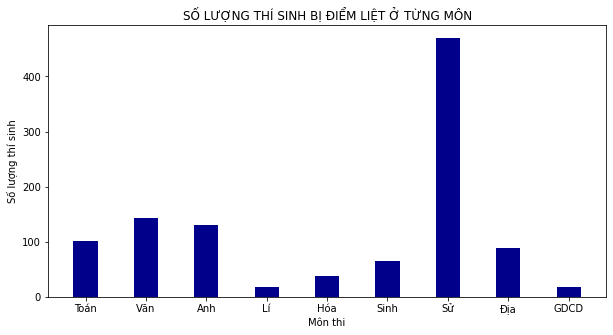

In [44]:
import numpy as np
import matplotlib.pyplot as plt

data = {'Toán':count_math, 'Văn':count_lit,
        'Anh':count_eng,'Lí':count_phy,
        'Hóa':count_che,'Sinh':count_bio,
        'Sử':count_his,'Địa':count_geo,
        'GDCD':count_gdcd,}
nums = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(nums, values, color ='darkblue',
        width = 0.4)
 
plt.xlabel("Môn thi")
plt.ylabel("Số lượng thí sinh")
plt.title("SỐ LƯỢNG THÍ SINH BỊ ĐIỂM LIỆT Ở TỪNG MÔN")
plt.show()

Từ Biểu đồ SỐ LƯỢNG THÍ SINH BỊ ĐIỂM LIỆT Ở TỪNG MÔN cho thấy môn Sử có số lượng thí sinh bị điểm dưới 1 cao nhất và ngược lại môn Lí có số lượng thí sinh bị điểm liệt ít nhất

Phổ điểm môn Toán 2021

Text(0, 0.5, 'Phổ điểm Toán')

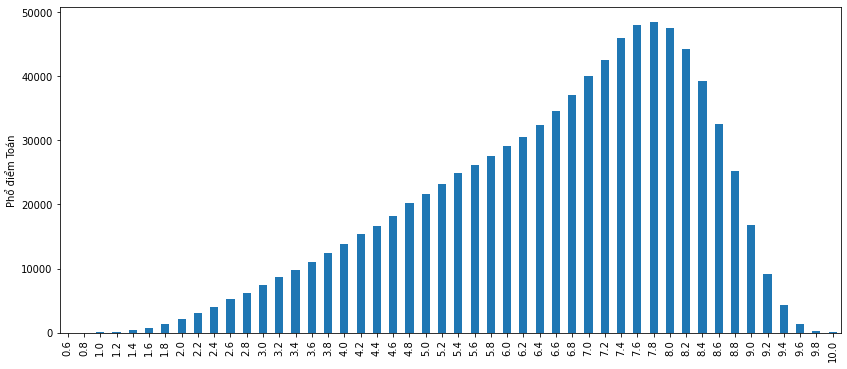

In [ ]:
ax = point_df['Toán'].value_counts().sort_index().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Phổ điểm Toán')

Nhận xét :

1.   Số lượng thí sinh đạt từ 7 đến 9 điểm khá cao cho thấy đề Toán năm nay ở mức độ dễ so với mọi năm  
2.   8 là điểm mà nhiều thí sinh tham gia thi toán đạt được nhiều nhất dựa vào biểu đồ 
3.   Điểm trung bình của môn Toán là 6.58



Phổ điểm môn Văn 2021

In [32]:
element_not_none = [literature[i] for i in range(len(literature)) if literature[i]!=None] #check if not none 
wrong_point = [i for i in element_not_none if i%0.25!=0] # những điểm không nằm trong [0.25,0.5,0.75,1]
len(wrong_point)

5876

Text(0, 0.5, 'Phổ điểm Văn')

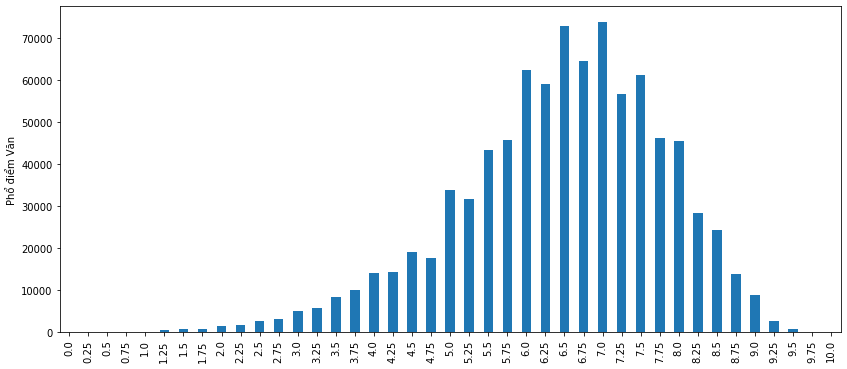

In [29]:
ax = point_df['Văn'].value_counts().sort_index().drop(labels=wrong_point).plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Phổ điểm Văn')

Nhận xét :


1.   Điểm trung bình của môn Văn là 6.44
2.   7.0 là điểm mà nhiều thí sinh tham gia môn Văn đạt được nhiều nhất
3.   số lượng thí sinh đạt điểm từ 6 đến 7 khá cao cho thấy đề Văn năm nay cũng rất vừa sức đối với các thí sinh 



Phổ điểm môn Ngoại ngữ 2021


Text(0, 0.5, 'Phổ điểm Ngoại ngữ')

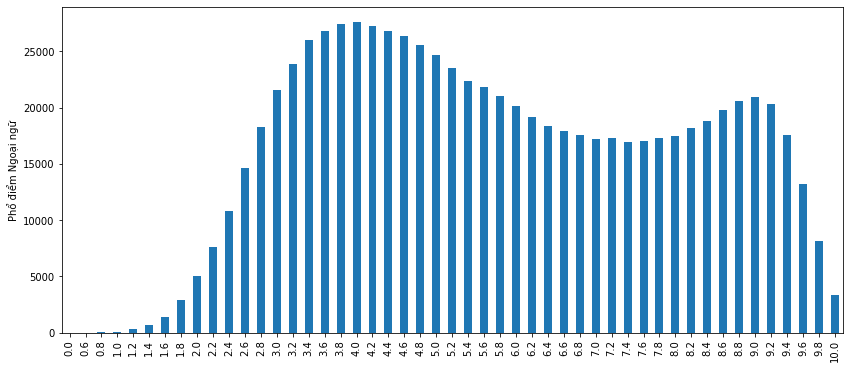

In [ ]:
ax = point_df['Anh'].value_counts().sort_index().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Phổ điểm Ngoại ngữ')

Nhận xét:


1.   Điểm trung bình môn Anh là 5.79
2.   Số lượng thí sinh đạt điểm 4 là cao nhất 
3.   Nhìn vào biểu đồ ta thấy rõ sự phân bố khá đồng đều về mặt điểm số cho thấy đề Anh năm nay có sự phân hóa khá giỏi và trung bình rất tốt 



Phổ điểm môn Lý 2021

Text(0, 0.5, 'Phổ điểm Lý')

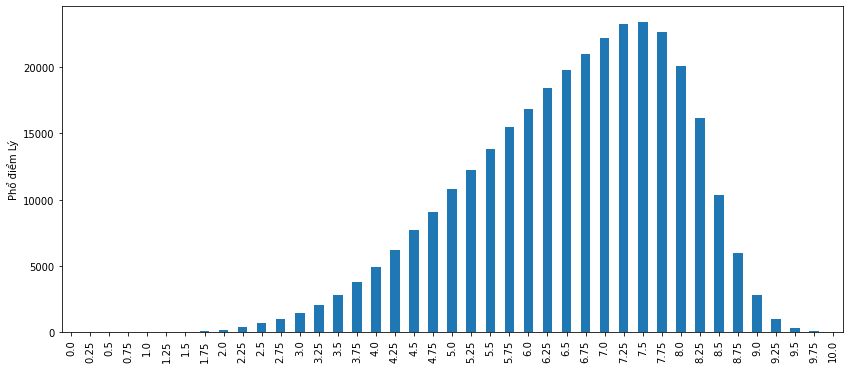

In [ ]:
ax = point_df['Lí'].value_counts().sort_index().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Phổ điểm Lý')

Nhận xét:


1.   Điểm trung bình của môn Lý là 6.56 
2.   Số lượng thí sinh đạt 7.5 là cao nhất
3.   Đề Lý năm nay có thể thấy không quá khó, cụ thể tập trung ở thang điểm 6 - 8 


Phổ điểm môn Hóa 2021

Text(0, 0.5, 'Phổ điểm Hóa')

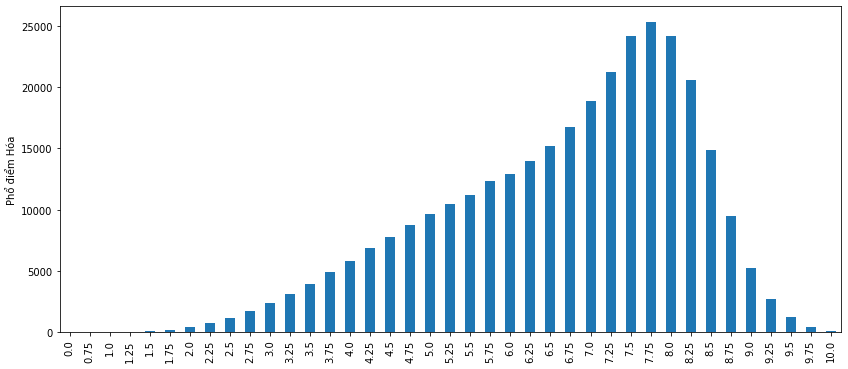

In [ ]:
ax = point_df['Hóa'].value_counts().sort_index().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Phổ điểm Hóa')

Nhận xét:


1.   Điểm trung bình của môn hóa là 6.66
2.   7.75 là số điểm mà nhiều thí sinh đạt được được nhất
3.   Đề hóa có độ phân hóa và độ khó cũng tương đồng như đề lí chủ yếu tập trung ở thang điểm 7-8 



Phổ điểm môn Sinh 2021

Text(0, 0.5, 'Phổ điểm Sinh')

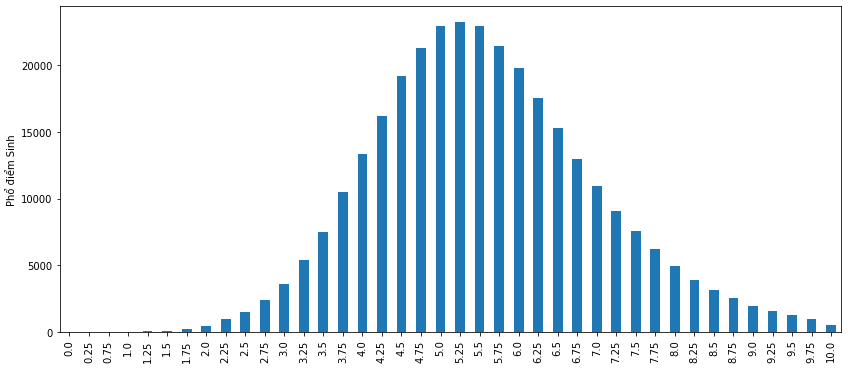

In [ ]:
ax = point_df['Sinh'].value_counts().sort_index().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Phổ điểm Sinh')

Nhận xét:


1.   Điểm trung bình của môn Sinh là 5.56
2.   Mức điểm mà nhiều thí sinh đạt được là 5,25
3.   Có thể thấy mức độ khó của đề môn Sinh cao hơn so với Hóa và Lý  



Phổ điểm môn Sử 2021

Text(0, 0.5, 'Phổ điểm Sử')

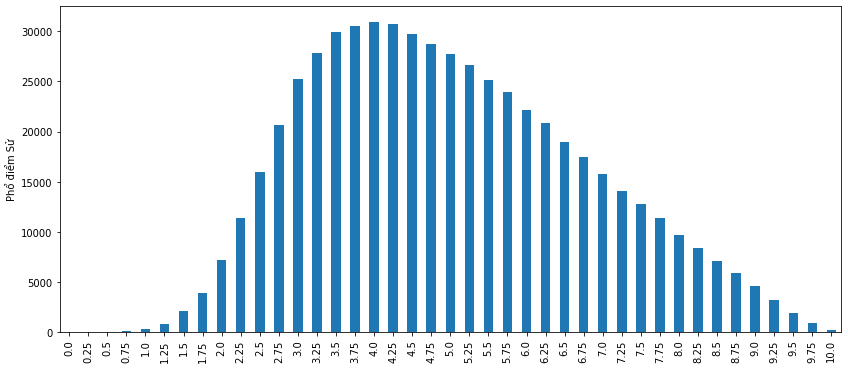

In [ ]:
ax = point_df['Sử'].value_counts().sort_index().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Phổ điểm Sử')

Nhận xét:


1.   Điểm trung bình của môn sử là thấp nhất trong các môn là 4.99
2.   Có thể thấy mức điểm nhiều thí sinh đạt được chỉ ở 4.0




Phổ điểm môn Địa 2021

Text(0, 0.5, 'Phổ điểm Địa')

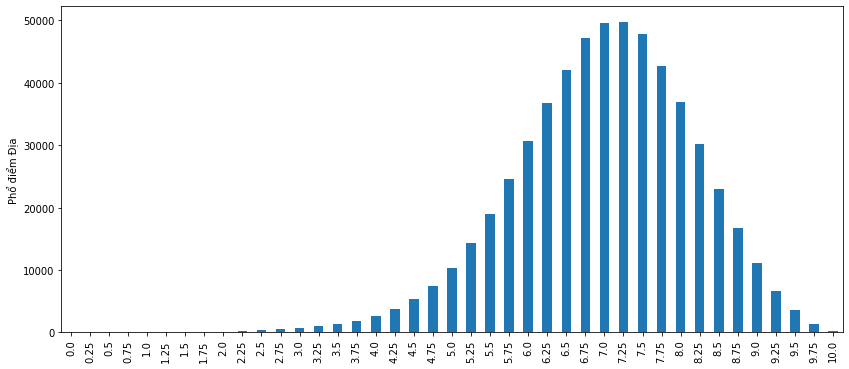

In [ ]:
ax = point_df['Địa'].value_counts().sort_index().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Phổ điểm Địa')

Nhận xét:


1.   Điểm trung bình môn địa là 6.98
2.   Có thể thấy mức độ khó của môn địa dễ hơn môn sử rất nhiều, có nhiều thí sinh đạt điểm 7



Phổ điểm môn GDCD 2021

Text(0, 0.5, 'Phổ điểm GDCD')

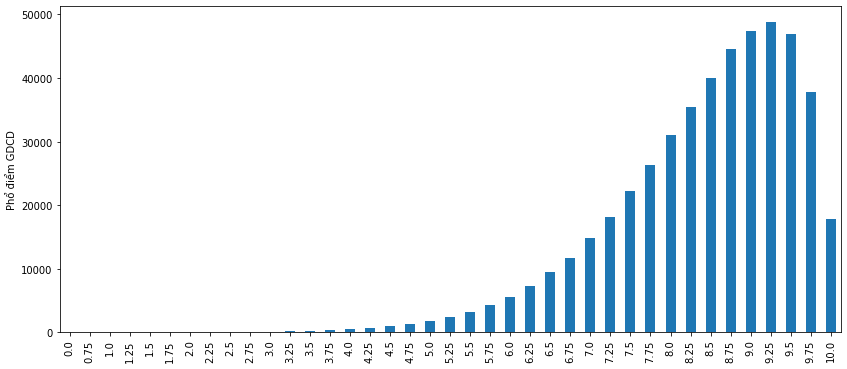

In [ ]:
ax = point_df['GDCD'].value_counts().sort_index().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Phổ điểm GDCD')

Nhận xét:


1.   Đây là môn có điểm trung bình cao nhất 8.4
2.   Nhìn vào biểu đồ có thể thấy được rất nhiều thí sinh đạt được điểm tuyệt đối và 9 là mức mà nhiều thí sinh đạt được nhất



Tiếp theo ta phân tích theo từng tổ hợp các môn mà thí sinh sẽ lựa chọn thi bao gồm số lượng các thí sinh của từng khối, phổ điểm của các khối môn phổ biến mà thí sinh hay chọn như A,A1,B,C,D. Ngoài ra thống kê số thí sinh rớt tốt nghiệp do bị điểm liệt


 BỊ ĐIỂM LIỆT



*   Điểm liệt trong kỳ thi tốt nghiệp THPT tức là điểm để giới hạn thí sinh đó có đủ điều kiện để được công nhận tốt nghiệp hay không. Theo quy chế tuyển sinh, tất cả các bài thi và các môn thi thành phần của bài thi tổ hợp lấy điểm để xét công nhận tốt nghiệp đều phải đạt trên 1,0 điểm. Như vậy nếu đạt điểm 1,0 điểm hoặc dưới 1,0 điểm, điểm sẽ bị coi là "điểm liệt".
*   Theo đó, thí sinh đủ điều kiện xét tốt nghiệp là khi tất cả các bài thi và các môn thi thành phần của bài thi tổ hợp lấy điểm để xét công nhận tốt nghiệp đều phải đạt trên 1,0 điểm theo thang điểm 10. 




In [45]:
import numpy as np
#các dữ liệu được phân ra thành 2 dataframe 
#khtn nếu thí sinh chỉ có điểm Lí Hóa Sinh mà không có Sử Địa GDCD và ngược lại 
khxh = point_df.loc[(point_df['Lí'].isna()) & (point_df['Hóa'].isna()) & (point_df['Sinh'].isna())].reset_index()
khtn = point_df.loc[(point_df['Sử'].isna()) & (point_df['Địa'].isna()) & (point_df['GDCD'].isna())].reset_index()

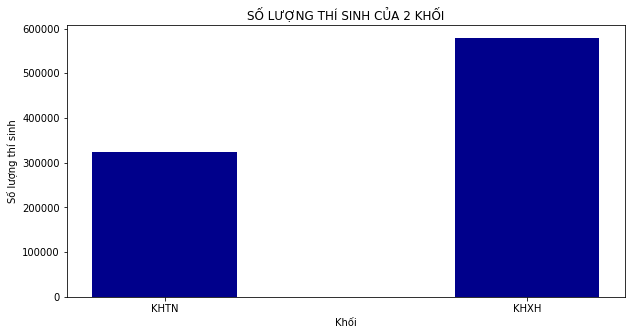

In [46]:
import numpy as np
import matplotlib.pyplot as plt

data = {'KHTN':len(khtn), 'KHXH':len(khxh)}       #visualize dữ liệu
nums = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(nums, values, color ='darkblue',
        width = 0.4)
 
plt.xlabel("Khối")
plt.ylabel("Số lượng thí sinh")
plt.title("SỐ LƯỢNG THÍ SINH CỦA 2 KHỐI")
plt.show()

Có thể thấy năm 2021 số lượng thí sinh tham gia thi tổ hợp KHXH cao gần gấp đôi số lượng thí sinh tham gia thi tổ hợp KHTN. Tiếp theo ta sẽ thống kê xem có bao nhiêu thí sinh sẽ bị rớt tốt nghiệp do bị điểm liệt

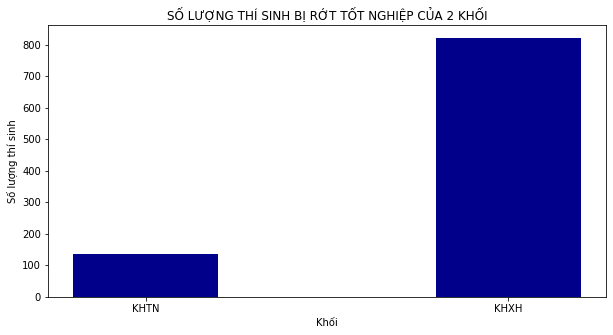

In [70]:
khtn_para = len(khtn[(khtn['Toán']<=1) | (khtn['Văn']<=1) | (khtn['Anh']<=1) | 
         (khtn['Lí']<=1) | (khtn['Hóa']<=1) | (khtn['Sinh']<=1)])
khxh_para = len(khxh[(khxh['Toán']<=1) | (khxh['Văn']<=1) | (khxh['Anh']<=1) | 
         (khxh['Sử']<=1) | (khtn['Địa']<=1) | (khtn['GDCD']<=1)])
data = {'KHTN':khtn_para, 'KHXH':khxh_para}
nums = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(nums, values, color ='darkblue',
        width = 0.4)
 
plt.xlabel("Khối")
plt.ylabel("Số lượng thí sinh")
plt.title("SỐ LƯỢNG THÍ SINH BỊ RỚT TỐT NGHIỆP CỦA 2 KHỐI")
plt.show()

In [88]:
print('Số thí sinh rớt tốt nghiệp do điểm liệt: ',khtn_para+khxh_para)
print(100-((khtn_para+khxh_para)/len(point_df))/100)

Số thí sinh rớt tốt nghiệp do điểm liệt:  957
99.99998936186769


Nhận xét: 

1.   Số thí sinh rớt tốt nghiệp do liệt là 957 thí sinh
2.   Vậy dựa trên số liệu ta có thể thấy đến 99% thí sinh Không bị điểm liệt. Để xét tốt nghiệp còn phải xem xét thêm những điều kiện khác



Thống kê phổ điểm của các khối phổ biến (A,A1,B,C,D).

Các khối A, A1, B sẽ được tính dựa trên dataframe KHTN. Khối C sẽ được tính dựa trên dataframe KHXH. Riêng khối D sẽ được tính dựa trên dataframe của tất cả thí sinh vì khối D bao gồm cả ba môn bắt buộc là (Toán, Văn, Anh)

Điểm của từng khối sẽ được tính dựa trên tổng điểm các môn thuộc khối đó

ví dụ:khối A gồm toán, lý, hóa. Thí sinh NVA thi được(Toán:8,Lí:9,Hóa:10 => điểm khối A của thí sinh đó là 27

lưu ý: điểm được tính không bao gồm điểm cộng

In [75]:
khtn['Khối A'] = khtn['Toán']+khtn['Lí']+khtn['Hóa']
khtn['Khối A1'] = khtn['Toán']+khtn['Lí']+khtn['Anh']
khtn['Khối B'] = khtn['Toán']+khtn['Hóa']+khtn['Sinh']
khxh['Khối C'] = khxh['Văn']+khxh['Sử']+khxh['Địa']
point_df['Khối D'] = point_df['Toán']+point_df['Văn']+point_df['Anh']

In [76]:
khtn

,index,Toán,Văn,Anh,Lí,Hóa,Sinh,Sử,Địa,GDCD,Khối A,Khối A1,Khối B
0,3,8.4,6.75,10.0,4.00,3.00,3.50,NaN,NaN,NaN,15.40,22.40,14.90
1,4,8.8,8.25,9.4,8.25,5.75,5.25,NaN,NaN,NaN,22.80,26.45,19.80
2,6,9.0,5.25,9.0,7.25,4.75,3.50,NaN,NaN,NaN,21.00,25.25,17.25
3,9,8.8,6.25,9.2,8.75,8.75,3.00,NaN,NaN,NaN,26.30,26.75,20.55
4,16,7.8,8.00,9.6,7.50,8.00,7.25,NaN,NaN,NaN,23.30,24.90,23.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324077,899589,7.8,6.50,7.2,7.25,7.25,8.00,NaN,NaN,NaN,22.30,22.25,23.05
324078,899590,8.6,5.75,4.2,7.50,6.75,6.50,NaN,NaN,NaN,22.85,20.30,21.85
324079,899591,8.0,6.25,5.2,8.50,7.75,6.75,NaN,NaN,NaN,24.25,21.70,22.50
324080,899592,7.6,7.00,6.6,7.50,5.50,6.75,NaN,NaN,NaN,20.60,21.70,19.85


In [77]:
khxh

,index,Toán,Văn,Anh,Lí,Hóa,Sinh,Sử,Địa,GDCD,Khối C
0,0,2.2,3.50,NaN,NaN,NaN,NaN,2.50,5.50,NaN,11.50
1,1,9.2,8.25,10.0,NaN,NaN,NaN,5.75,9.75,9.25,23.75
2,2,4.4,6.25,NaN,NaN,NaN,NaN,4.25,4.00,NaN,14.50
3,5,8.0,8.75,8.6,NaN,NaN,NaN,5.00,6.50,9.25,20.25
4,7,NaN,7.50,NaN,NaN,NaN,NaN,2.25,7.00,NaN,16.75
...,...,...,...,...,...,...,...,...,...,...,...
579147,899582,3.8,5.00,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN
579148,899584,5.8,6.75,NaN,NaN,NaN,NaN,7.00,NaN,NaN,NaN
579149,899585,3.8,5.00,NaN,NaN,NaN,NaN,7.25,NaN,NaN,NaN
579150,899587,NaN,5.00,NaN,NaN,NaN,NaN,9.00,8.00,NaN,22.00


In [ ]:
#hàm thống kê số lượng thí sinh trong một khoảng điểm nhất định    
#ví dụ: khối A có 3000 thí sinh đạt được từ 25-26 điểm
def point_label(data):  
  arr = data.dropna().astype('int32').value_counts().sort_index()
  arr_label = [str(i)+'-'+str(i+1) for i in arr.keys()]
  if arr_label[-1] == '30-31':
    arr_label[-1]='30'
  return arr , arr_label    

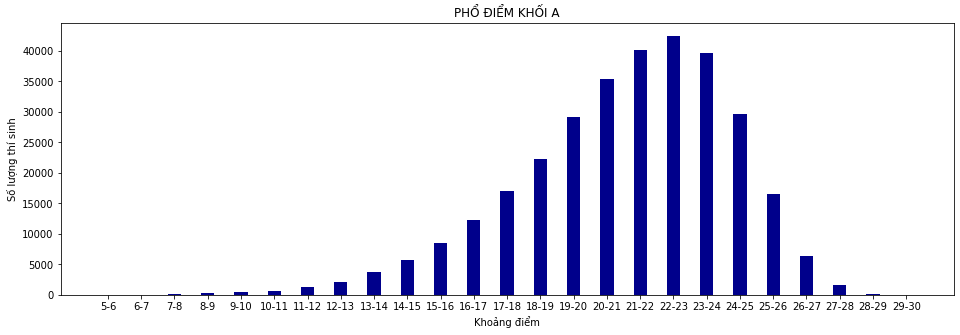

In [ ]:

values, nums = point_label(khtn['Khối A'])
fig = plt.figure(figsize = (16, 5))

plt.bar(nums,values, color ='darkblue',
        width = 0.4)
 
plt.xlabel("Khoảng điểm")
plt.ylabel("Số lượng thí sinh")
plt.title("PHỔ ĐIỂM KHỐI A")
plt.show()

In [81]:
khtn['Khối A'].describe()

count    315816.000000
mean         21.019924
std           3.168541
min           5.100000
25%          19.150000
50%          21.450000
75%          23.350000
max          29.550000
Name: Khối A, dtype: float64

Nhận xét: 

1.   Điểm trung bình của khối A là 21.01
2.   Nhiều thí sinh đạt được khoảng điểm 22-23 




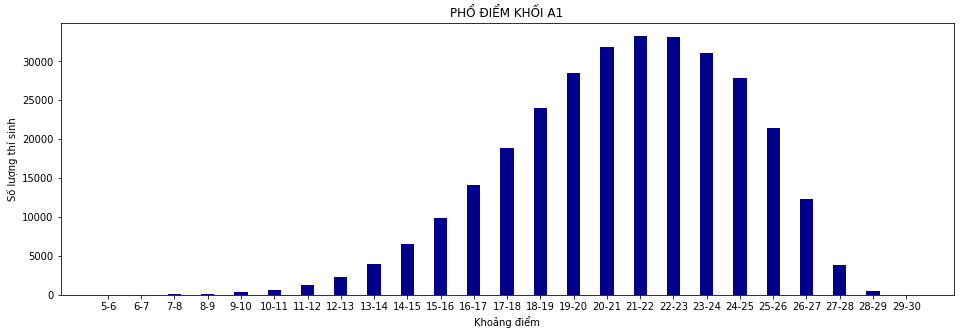

In [ ]:
values, nums = point_label(khtn['Khối A1'])
fig = plt.figure(figsize = (16, 5))

plt.bar(nums,values, color ='darkblue',
        width = 0.4)
 
plt.xlabel("Khoảng điểm")
plt.ylabel("Số lượng thí sinh")
plt.title("PHỔ ĐIỂM KHỐI A1")
plt.show()

In [82]:
khtn['Khối A1'].describe()

count    305950.000000
mean         21.025474
std           3.408677
min           5.350000
25%          18.750000
50%          21.300000
75%          23.650000
max          29.550000
Name: Khối A1, dtype: float64

Nhận xét:


1.   Điểm trung bình khối A1 là 21.02
2.   Nhiều thí sinh đạt được ở khoảng điểm 21-22



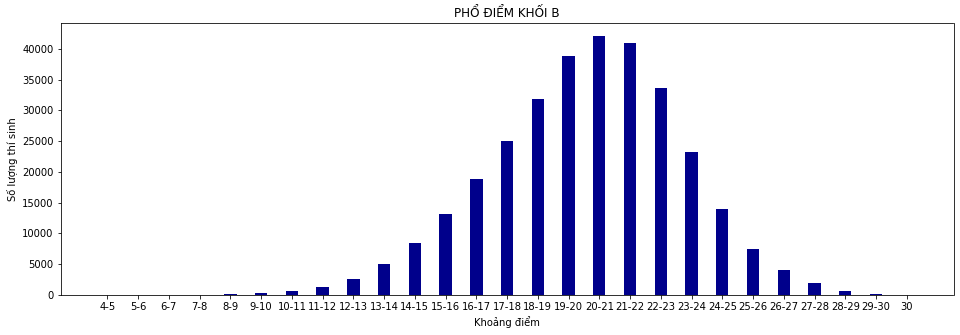

In [ ]:
values, nums = point_label(khtn['Khối B'])
fig = plt.figure(figsize = (16, 5))

plt.bar(nums,values, color ='darkblue',
        width = 0.4)
 
plt.xlabel("Khoảng điểm")
plt.ylabel("Số lượng thí sinh")
plt.title("PHỔ ĐIỂM KHỐI B")
plt.show()

In [83]:
khtn['Khối B'].describe()

count    313862.000000
mean         20.046948
std           3.066912
min           4.400000
25%          18.100000
50%          20.250000
75%          22.150000
max          30.000000
Name: Khối B, dtype: float64

Nhận xét:


1.   Điểm trung bình của Khối B là 20.04
2.   Khối B cũng có nhiều thí sinh đạt được ở khoảng điểm 20-21



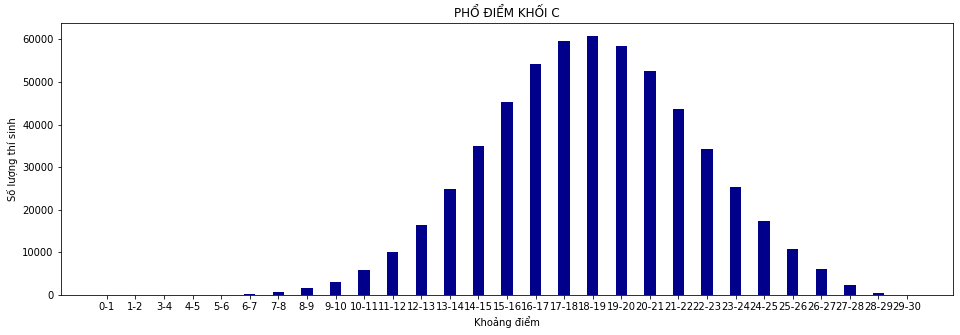

In [ ]:
values, nums = point_label(khxh['Khối C'])
fig = plt.figure(figsize = (16, 5))

plt.bar(nums,values, color ='darkblue',
        width = 0.4)
 
plt.xlabel("Khoảng điểm")
plt.ylabel("Số lượng thí sinh")
plt.title("PHỔ ĐIỂM KHỐI C")
plt.show()

In [84]:
khxh['Khối C'].describe()

count    569495.000000
mean         18.327375
std           3.623555
min           0.750000
25%          15.750000
50%          18.250000
75%          20.750000
max          29.250000
Name: Khối C, dtype: float64

Nhận xét:


1.   Có rất nhiều sinh viên chọn theo khối C
2.   Điểm trung bình khối C thấp hơn so với 3 khối thuộc tổ hợp KHTN chỉ 18.32
3.   Ở khoảng 18-19 có rất nhiều thí sinh đạt được



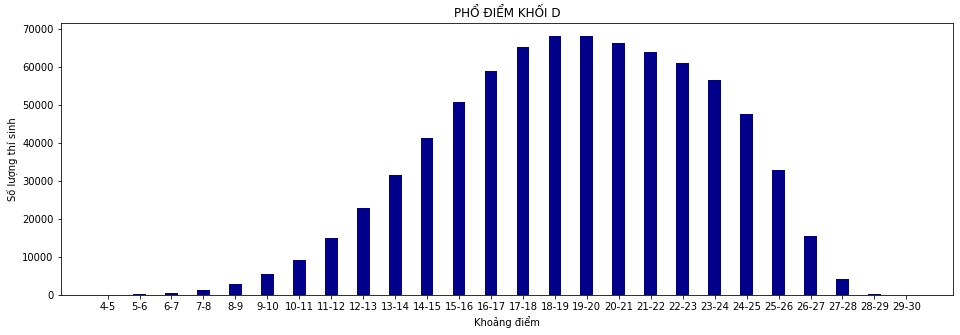

In [ ]:
values, nums = point_label(point_df['Khối D'])
fig = plt.figure(figsize = (16, 5))

plt.bar(nums,values, color ='darkblue',
        width = 0.4)
 
plt.xlabel("Khoảng điểm")
plt.ylabel("Số lượng thí sinh")
plt.title("PHỔ ĐIỂM KHỐI D")
plt.show()

In [85]:
point_df['Khối D'].describe()

count    788674.000000
mean         19.144029
std           4.041374
min           4.250000
25%          16.250000
50%          19.300000
75%          22.300000
max          29.150000
Name: Khối D, dtype: float64

Nhận xét:


1.   Điểm trung bình của khối D là 19.01 điểm này được tính dựa trên thí sinh tham gia của 2 tổ hợp KHTN và KHXH
2.   Số lượng thí sinh đạt được trong các khoảng điểm của Khối D có phần ít chênh lệch hơn so với các khối khác, khoảng điểm từ 18-19 và 19-20 có số lượng thí sinh gần như bằng nhau ngoài ra ở các khoảng điểm khác mức chênh lệch không lớn so với các khoảng điểm gần đó.  



**Lưu ý: Đó là tất cả số liệu được thống kê từ dữ liệu thi tuyển sinh 2021 và được trực quan hóa bằng biểu đồ cột chỉ mang tính chất tham khảo nhằm mục đích có được một cái nhìn chung vào tình hình thi tuyển sinh năm nay.** 

Hứa Văn Sơn - RnD MWG 